In [3]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
#Load the Dataset
data = pd.read_csv("Custom_dataset.csv")

In [5]:
#Get dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    19 non-null     int64  
 1   Annual_Income($1000)   19 non-null     int64  
 2   Spending_Score(1-100)  19 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 588.0 bytes


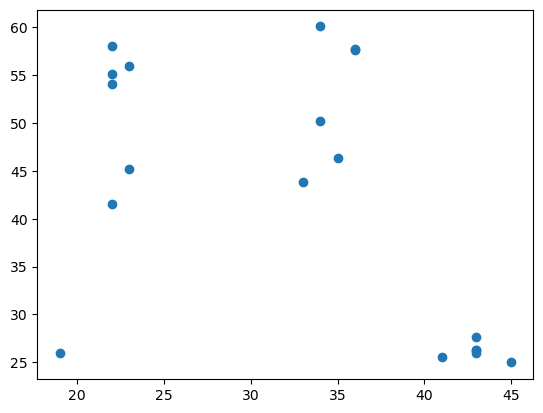

In [7]:
#Show data in graphically
plt.scatter(data['Age'],data['Spending_Score(1-100)'])

In [9]:
#update the dataset data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.39393847, -0.4539302 , -1.3030701 ],
       [ 0.27169987, -0.30946078,  0.28036868],
       [ 1.16949075, -0.51761781, -1.20253418],
       [-1.18721031, -0.41185452,  0.92995037],
       [-1.07498645, -0.60090177,  0.20000231],
       [ 0.94504303, -0.54549389, -1.25897123],
       [-1.18721031,  1.48979064,  1.14616165],
       [ 0.04725215, -0.29430131,  0.09476642],
       [ 0.15947601, -0.61262633,  1.30082542],
       [ 1.16949075, -0.62137213, -1.22940049],
       [-1.07498645, -0.62790815,  0.99155725],
       [ 1.16949075, -0.33293733, -1.10571347],
       [-1.18721031,  1.10692824, -0.07748999],
       [ 1.16949075, -0.61388764, -1.20941148],
       [ 0.38392373, -0.53262107,  1.12237042],
       [ 0.15947601,  2.61653182,  0.57058872],
       [ 0.38392373, -0.62665845,  1.12386243],
       [-1.18721031,  2.19350266,  0.85435327],
       [-1.52388189, -0.30518199, -1.228216  ]])

In [11]:
#Select the best Optimize Cluster value
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    wcss_error.append(model.inertia_)

C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

In [12]:
#Check the WCSS Error
wcss_error

[57.0,
 29.674305509893706,
 15.343238491894306,
 8.570599707674344,
 6.426726753509913,
 3.446629718381173,
 3.9780533914021934,
 0.9979563562734541,
 0.6056525558391677,
 0.31547118909021626]

Text(0, 0.5, 'WCSS Error')

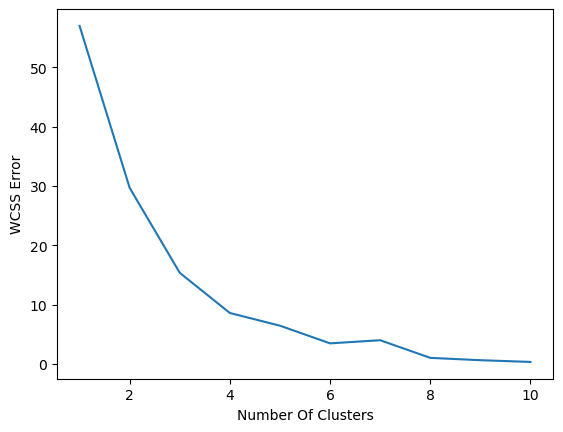

In [13]:
#Represent new data Clusters
plt.plot(k_values,wcss_error)
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS Error")

In [14]:
#Create a simple cluster model
model = KMeans(n_clusters=7)
prediction = model.fit_predict(data[['Age','Spending_Score(1-100)']])

C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
#Get the prediction 
prediction

array([1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 3],
      dtype=int32)

In [16]:
#Add the Cluster Column
data['cluster'] = prediction

In [17]:
#Reload the New Dataset
data.head()

,Age,Annual_Income($1000),Spending_Score(1-100),cluster
0,45,523789288994,24.975428,1
1,35,952348997507,46.338292,2
2,43,334863872452,26.331802,1
3,22,648604220387,55.102082,0
4,23,87807110463,45.254034,2


In [18]:
#Load the clusters
model.cluster_centers_

array([[24.6       , 56.64845998],
       [43.        , 26.12067043],
       [31.28571429, 48.94385108],
       [19.        , 25.98531743]])

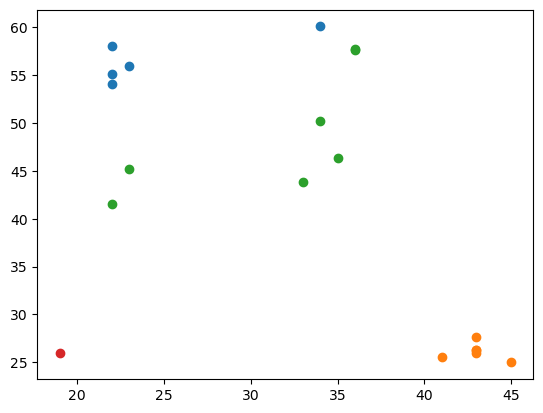

In [20]:
#Show clusters graphically
c1 = data[data['cluster'] == 0]
plt.scatter(c1['Age'],c1['Spending_Score(1-100)'])
c2 = data[data['cluster'] == 1]
plt.scatter(c2['Age'],c2['Spending_Score(1-100)'])
c3 = data[data['cluster'] == 2]
plt.scatter(c3['Age'],c3['Spending_Score(1-100)'])
c4 = data[data['cluster'] == 3]
plt.scatter(c4['Age'],c4['Spending_Score(1-100)'])
c5 = data[data['cluster'] == 4]
plt.scatter(c5['Age'],c5['Spending_Score(1-100)'])
c6 = data[data['cluster'] == 5]
plt.scatter(c6['Age'],c6['Spending_Score(1-100)'])
c7 = data[data['cluster'] == 6]
plt.scatter(c7['Age'],c7['Spending_Score(1-100)'])
c8 = data[data['cluster'] == 7]
plt.scatter(c8['Age'],c8['Spending_Score(1-100)'])
c9 = data[data['cluster'] == 8]
plt.scatter(c9['Age'],c9['Spending_Score(1-100)'])

In [26]:
#Implement a Model
kmodel = KMeans(n_clusters=7,init='k-means++',random_state=42)
kmodel.fit(scaled_data)

C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,7
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [29]:
import pickle
#Save Model
with open('model.pickle','wb') as file:
    pickle.dump(kmodel,file)
with open('scaler.pickle','wb') as file:
    pickle.dump(scaler,file)